In [67]:
# import pandas as pd
# import time
# # time1 = time.time()
# a = pd.read_csv('C:/Users/danil/Downloads/Data/Chicago_Crimes/Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)
# time2 = time.time()
# elap = time2-time1
# print(elap)
#print(a.head(10))
#print(a.shape)
#b = pd.read_csv('C:/Users/danil/Downloads/Data/Chicago_Crimes/Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
#a = a.append(b)
#print(a.shape)

7.31853175163269
0    05/03/2016 11:40:00 PM
1    05/03/2016 09:40:00 PM
2    05/03/2016 11:31:00 PM
3    05/03/2016 10:10:00 PM
4    05/03/2016 10:00:00 PM
5    05/03/2016 10:35:00 PM
6    05/03/2016 10:30:00 PM
7    05/03/2016 09:30:00 PM
8    05/03/2016 04:00:00 PM
9    05/03/2016 10:30:00 PM
Name: Date, dtype: object


In [123]:
# from datetime import datetime
# print(a['Date'][0:10])
# print(len(a['Date'][0]))
# print(a['Date'][0][6:10])
# print((parse_datetime(a['Date'][0:10])))

0    05/03/2016 11:40:00 PM
1    05/03/2016 09:40:00 PM
2    05/03/2016 11:31:00 PM
3    05/03/2016 10:10:00 PM
4    05/03/2016 10:00:00 PM
5    05/03/2016 10:35:00 PM
6    05/03/2016 10:30:00 PM
7    05/03/2016 09:30:00 PM
8    05/03/2016 04:00:00 PM
9    05/03/2016 10:30:00 PM
Name: Date, dtype: object
22
2016
(DatetimeIndex(['2016-05-03 23:40:00', '2016-05-03 21:40:00',
               '2016-05-03 23:31:00', '2016-05-03 22:10:00',
               '2016-05-03 22:00:00', '2016-05-03 22:35:00',
               '2016-05-03 22:30:00', '2016-05-03 21:30:00',
               '2016-05-03 16:00:00', '2016-05-03 22:30:00'],
              dtype='datetime64[ns]', freq=None),)


In [130]:
import numpy as np
from datetime import datetime

def parse_datetime(dt_array):
    b = []
    for i in dt_array:
        year = datetime.strptime(i, '%m/%d/%Y %I:%M:%S %p')
        #year = datetime(int(i[6:10]), int(i[0:2]), int(i[3:5]))
        b.append(year)
    return pd.to_datetime(b)

def read_csv(filename, cache=None):
    df = pd.read_csv(filename, error_bad_lines = False)
    df['Date'] = parse_datetime(df['Date'])
    return df

a = read_csv('C:/Users/danil/Downloads/Data/Chicago_Crimes/Chicago_Crimes_2012_to_2017.csv')


In [131]:
print(a.head(5))

   Unnamed: 0        ID Case Number                Date                Block  \
0           3  10508693    HZ250496 2016-05-03 23:40:00   013XX S SAWYER AVE   
1          89  10508695    HZ250409 2016-05-03 21:40:00   061XX S DREXEL AVE   
2         197  10508697    HZ250503 2016-05-03 23:31:00  053XX W CHICAGO AVE   
3         673  10508698    HZ250424 2016-05-03 22:10:00    049XX W FULTON ST   
4         911  10508699    HZ250455 2016-05-03 22:00:00    003XX N LOTUS AVE   

   IUCR            Primary Type              Description Location Description  \
0  0486                 BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   
1  0486                 BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   
2  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT               STREET   
3  0460                 BATTERY                   SIMPLE             SIDEWALK   
4  0820                   THEFT           $500 AND UNDER            RESIDENCE   

  Arrest              ...       

In [146]:
print(a.columns)
a['Date'] = pd.to_datetime(a['Date'])
#https://www.kaggle.com/currie32/crimes-in-chicago

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Month', 'Day_of_Week', 'Hour'],
      dtype='object')


In [182]:
import plotly.plotly as py
import plotly.graph_objs as go

print(a.Date.dt.year.value_counts())
year_by_year = a.Date.dt.year.value_counts()
year_by_year_ind = a.Date.dt.year.value_counts().index
year = pd.DataFrame({'year':year_by_year.index, 'value':year_by_year.values})
print(year)
year = year.sort_values('year',ascending=True)
year = year.drop(5)
data = [go.Scatter(x=year.year,y=year.value)]

layout = go.Layout(
    xaxis=dict(
        autotick=False,
        tick0=2012,
        dtick=1,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        ticklen=5,
        tickwidth=0.5,
        tickcolor='#000'
    ))
    
fig = dict(data=data, layout=layout)
iplot(fig)

2012    335670
2013    306703
2014    274527
2016    265462
2015    262995
2017     11357
Name: Date, dtype: int64
    value  year
0  335670  2012
1  306703  2013
2  274527  2014
3  265462  2016
4  262995  2015
5   11357  2017


In [203]:
a['Year'] = a.Date.dt.year
a_2012 = a[a['Year'] == 2012]
a_2013 = a[a['Year'] == 2013]
a_2014 = a[a['Year'] == 2014]
a_2015 = a[a['Year'] == 2015]
a_2016 = a[a['Year'] == 2016]
years = [a_2012,a_2013,a_2014,a_2015,a_2016]
y_data_1 = []
y_data_2 = []
for i in years:
    y = i['Primary Type'].value_counts().values[0:1]
    y_data_1.append(y)
    z = i['Primary Type'].value_counts().values[1:2]
    y_data_2.append(z)
print(y_data_1)
print(y_data_2[0:5])

[array([75454], dtype=int64), array([71524], dtype=int64), array([61530], dtype=int64), array([57292], dtype=int64), array([61167], dtype=int64)]
[array([59132], dtype=int64), array([54003], dtype=int64), array([49444], dtype=int64), array([48904], dtype=int64), array([50243], dtype=int64)]


In [208]:
import plotly.plotly as py
import plotly.graph_objs as go

title = 'Main Source for News'

labels = ['Television', 'Newspaper']

colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']

mode_size = [8, 8]

line_size = [2, 2]

x_data = [
    [2012, 2013, 2014, 2015, 2016],
    [2012, 2013, 2014, 2015, 2016],
]

y_data = [
    [75454,71524,61530,57292,61167],
    [59132,54003,49444,48904,50243]
]

traces = []

for i in range(0, 2):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    traces.append(go.Scatter(
        x=[x_data[i][0], x_data[i][4]],
        y=[y_data[i][0], y_data[i][4]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        autotick=False,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color=colors,),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[4],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[4]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color=colors,),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Main Source for News',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
iplot(fig)


<Container object of 24 artists>

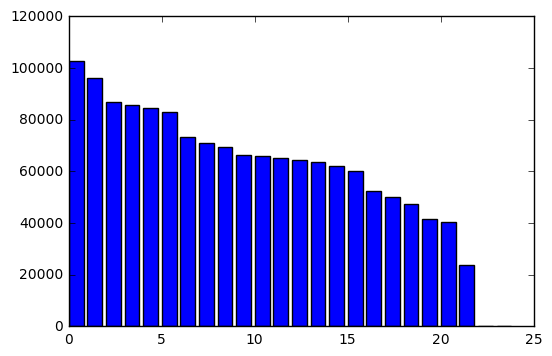

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
values = a.District.value_counts()
len_dist = np.arange(len(a.District.value_counts()))
plt.bar(len_dist,values)

In [7]:
print(a.Block.value_counts())

001XX N STATE ST                       3634
0000X W TERMINAL ST                    2746
008XX N MICHIGAN AVE                   2465
076XX S CICERO AVE                     2116
0000X N STATE ST                       1844
064XX S DR MARTIN LUTHER KING JR DR    1349
083XX S STEWART AVE                    1216
063XX S DR MARTIN LUTHER KING JR DR    1138
051XX W MADISON ST                     1115
046XX W NORTH AVE                      1113
009XX W BELMONT AVE                    1102
011XX S CANAL ST                       1084
008XX N STATE ST                       1046
040XX W LAKE ST                        1007
100XX W OHARE ST                        965
006XX N MICHIGAN AVE                    953
038XX W ROOSEVELT RD                    925
0000X W HUBBARD ST                      922
033XX W FILLMORE ST                     919
042XX W MADISON ST                      914
012XX S WABASH AVE                      911
0000X S STATE ST                        910
035XX N CLARK ST                

In [8]:
print(a['FBI Code'].value_counts())

06     329460
08B    227082
14     155455
26     137597
18     129796
05      83397
08A     68076
11      66547
07      61138
03      57313
04B     36618
04A     23927
15      17326
24      17204
10       8267
16       7654
02       7418
20       6829
17       5912
01A      2637
19       2215
09       2200
22       1953
13        413
12        268
01B        12
Name: FBI Code, dtype: int64


In [142]:
# a['Year']= a['Date'].dt.year
# a['Month'] = a['Date'].dt.month
# a['Day_of_Week'] = a['Date'].dt.dayofweek
# a['Hour'] = a['Date'].dt.hour
# print(a['Date'].dt.year[0:10])

0    2016
1    2016
2    2016
3    2016
4    2016
5    2016
6    2016
7    2016
8    2016
9    2016
Name: Date, dtype: int64


In [145]:
import plotly.plotly as py
import plotly.graph_objs as go

values_day_week = a.Date.dt.dayofweek.value_counts()
# print(values_day_week)
#len_day = np.arange(len(a.Day_of_Week.value_counts()))
#plt.bar(len_day,values_day_week)

data = [go.Bar(
            x=['Monday','Tuesday','Wednesday','Thursday','Friday',
               'Saturday','Sunday'],
            y=values_day_week
    )]
iplot(data)

4    218643
5    209743
2    208374
1    206129
3    205851
0    205762
6    202212
Name: Date, dtype: int64


In [139]:
import plotly.plotly as py
import plotly.graph_objs as go

values_hour = a.Hour.value_counts()
len_hour = np.arange(len(a.Hour.value_counts()))
#plt.bar(len_hour,values_hour)
#plt.xtickmarks()
#print(values_hour)
data = [go.Bar(
            x=values_hour.index,
            y=values_hour
    )]
iplot(data)

In [140]:
print(a['Primary Type'].value_counts())
pros = a[a['Primary Type'] == 'PROSTITUTION']
#print(pros.head(5))
print(pros['Location Description'].value_counts())
print(pros['Community Area'].value_counts())

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [141]:
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

mapbox_access_token = 'pk.eyJ1IjoiY2hlbHNlYXBsb3RseSIsImEiOiJjaXFqeXVzdDkwMHFrZnRtOGtlMGtwcGs4In0.SLidkdBMEap9POJGIe1eGw'

data = Data([
    Scattermapbox(
        lat= pros['Latitude'],
        lon= pros['Longitude'],
        mode='markers',
        marker=Marker(
            size=7
        ),
        text=['Chicago'],
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
        lat=lat_avg,
        lon=lon_avg,
        
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig)


In [55]:
lat_avg = a['Latitude'].mean()
lon_avg = a['Longitude'].mean()

0.0030350685119628906


In [16]:
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

mapbox_access_token = 'pk.eyJ1IjoiY2hlbHNlYXBsb3RseSIsImEiOiJjaXFqeXVzdDkwMHFrZnRtOGtlMGtwcGs4In0.SLidkdBMEap9POJGIe1eGw'

data = Data([
    Scattermapbox(
        lat= a['Latitude'][0:10000],
        lon= a['Longitude'][0:10000],
        mode='markers',
        marker=Marker(
            size=7
        ),
        text=['Chicago'],
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
        lat=lat_avg,
        lon=lon_avg,
        
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig)


In [47]:
comm_areas = pd.read_csv('C:/Users/danil/Downloads/Data/Chicago_Crimes/CommAreas.csv')
print(comm_areas.head(5))
print(comm_areas.loc[comm_areas['AREA_NUM_1'] == 25])

                                            the_geom  PERIMETER  AREA  \
0  MULTIPOLYGON (((-87.60914087617894 41.84469250...          0     0   
1  MULTIPOLYGON (((-87.59215283879394 41.81692934...          0     0   
2  MULTIPOLYGON (((-87.62879823733725 41.80189303...          0     0   
3  MULTIPOLYGON (((-87.6067081256125 41.816813770...          0     0   
4  MULTIPOLYGON (((-87.59215283879394 41.81692934...          0     0   

   COMAREA_  COMAREA_ID  AREA_NUMBE        COMMUNITY  AREA_NUM_1  \
0         0           0          35          DOUGLAS          35   
1         0           0          36          OAKLAND          36   
2         0           0          37      FULLER PARK          37   
3         0           0          38  GRAND BOULEVARD          38   
4         0           0          39          KENWOOD          39   

     SHAPE_AREA     SHAPE_LEN  
0  4.600462e+07  31027.054510  
1  1.691396e+07  19565.506153  
2  1.991670e+07  25339.089750  
3  4.849250e+07  28196.8